In [1]:
import numpy as np

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

2023-11-29 14:26:05.722526: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 14:26:05.759712: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-29 14:26:05.760560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 14:26:06.385159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = np.genfromtxt('../data/channel_N100_W1_10000.csv', delimiter=',')
data[0]

array([2.54229546, 1.79630015, 2.05689996, 1.36038473, 1.88883622,
       1.48355201, 2.14430002, 1.5675523 , 1.83440787, 1.46754126,
       1.75237671, 1.97328395, 2.18976183, 1.08689704, 0.93650583,
       1.03839966, 1.23160079, 1.85717403, 1.84751412, 2.27980314,
       1.27516047, 1.52739898, 1.43517645, 1.79728563, 1.50639386,
       2.10056385, 0.36112276, 1.31299024, 1.48012645, 1.78181359,
       1.18968094, 1.24500394, 2.1670301 , 1.82053917, 1.87483861,
       1.23882717, 2.20085004, 2.02200078, 1.29167401, 1.08425097,
       1.89808675, 1.80776958, 2.08402533, 1.42548752, 1.93918427,
       1.65841995, 2.07121549, 1.91381235, 1.61539902, 2.54758411,
       1.83188661, 2.14262381, 1.07555411, 1.34536734, 2.15378616,
       1.44982923, 1.76361083, 2.07851619, 0.89558286, 1.99695018,
       0.83857174, 1.74187415, 1.03123491, 1.65847531, 1.33937172,
       1.93660216, 2.02497323, 1.60346656, 1.9587343 , 1.09131968,
       1.30431903, 1.56178916, 1.25004133, 1.17849331, 2.06465

In [3]:
N = 100         #Number of ports
N_init = 50     #Number of observed ports

classification = False

In [4]:
# Creating input X
x_data = []

for i in range(len(data)):
    arr = []
    for j in range(0,N,int(N/N_init)):
        arr.append(data[i][j])
    x_data.append(arr)

x_data = np.array(x_data)
x_data[0]

array([2.54229546, 2.05689996, 1.88883622, 2.14430002, 1.83440787,
       1.75237671, 2.18976183, 0.93650583, 1.23160079, 1.84751412,
       1.27516047, 1.43517645, 1.50639386, 0.36112276, 1.48012645,
       1.18968094, 2.1670301 , 1.87483861, 2.20085004, 1.29167401,
       1.89808675, 2.08402533, 1.93918427, 2.07121549, 1.61539902,
       1.83188661, 1.07555411, 2.15378616, 1.76361083, 0.89558286,
       0.83857174, 1.03123491, 1.33937172, 2.02497323, 1.9587343 ,
       1.30431903, 1.25004133, 2.06465602, 2.64487348, 1.31251313,
       1.60153962, 0.35351296, 2.21090059, 2.0431834 , 1.14798389,
       2.20817715, 1.63014837, 1.6274005 , 1.6478007 , 1.94187522])

In [5]:
# Converting to 3D input, as requested in conv1D
sample_size = x_data.shape[0]
n_ports = x_data.shape[1] #N_init
input_dimension = 1

x_data_reshaped = x_data.reshape(sample_size, n_ports, input_dimension)

In [6]:
#Dados para Classificação

if classification:
    classification_data = data.copy()

    for i in range(len(classification_data)):
        pos = np.argmax(classification_data[i], axis=0)
        classification_data[i][:] = 0
        classification_data[i][pos] = 1

    classification_data[0]

In [7]:
# 70% Treino, 15% validação, 15% Teste

if classification:
    X_train, X_temp_test, y_train, y_temp_test = train_test_split(x_data_reshaped, classification_data, test_size=0.3)
    X_test, X_val, y_test, y_val = train_test_split(X_temp_test, y_temp_test, test_size=0.5)
else:
    X_train, X_temp_test, y_train, y_temp_test = train_test_split(x_data_reshaped, data, test_size=0.3)
    X_test, X_val, y_test, y_val = train_test_split(X_temp_test, y_temp_test, test_size=0.5)

In [8]:
#Normalize data

mean = X_train.mean()
std = X_train.std()

X_train = (X_train - mean) / std
X_val   = (X_val - mean) / std
X_test  = (X_test - mean) / std

if not classification:
    y_train = (y_train - mean) / std
    y_val   = (y_val - mean) / std
    y_test  = (y_test - mean) / std


In [9]:
input_shape = (N_init, 1)

model = models.Sequential()

# model.add(layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape))
# model.add(layers.Dropout(0.2))
# model.add(layers.AveragePooling1D(pool_size=2))
# model.add(layers.MaxPooling1D())

model.add(layers.LSTM(10, input_shape=input_shape))

# model.add(layers.Flatten())

model.add(layers.Dense(200, activation='linear'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200, activation='linear'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(200, activation='linear'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200, activation='linear'))
model.add(layers.Dropout(0.5))


if classification:
    model.add(layers.Dense(N, activation='softmax')) #Classification
else:
    model.add(layers.Dense(N, activation='linear'))  #Regression

model.summary()

2023-11-29 14:26:08.607137: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-29 14:26:08.608216: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 200)               2200      
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dropout_2 (Dropout)         (None, 200)               0

In [10]:
model.compile(optimizer='sgd',
            #   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),

            #Regression losses
                loss='mse',
                # loss='msle',

            #Classification losses
                # loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                # loss='categorical_crossentropy',

            metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=100, 
                    validation_data=(X_val, y_val),
                    shuffle=True,
                    batch_size=10
                    )

Epoch 1/100


700/700 [==============================] - 6s 6ms/step - loss: 0.3067 - accuracy: 0.0159 - val_loss: 0.2453 - val_accuracy: 0.0520
Epoch 2/100
700/700 [==============================] - 4s 5ms/step - loss: 0.2758 - accuracy: 0.0321 - val_loss: 0.2463 - val_accuracy: 0.0527
Epoch 3/100
700/700 [==============================] - 4s 5ms/step - loss: 0.2656 - accuracy: 0.0414 - val_loss: 0.2388 - val_accuracy: 0.0533
Epoch 4/100
700/700 [==============================] - 4s 5ms/step - loss: 0.2608 - accuracy: 0.0463 - val_loss: 0.2380 - val_accuracy: 0.0547
Epoch 5/100
700/700 [==============================] - 4s 5ms/step - loss: 0.2636 - accuracy: 0.0486 - val_loss: 0.2531 - val_accuracy: 0.0533
Epoch 6/100
700/700 [==============================] - 4s 6ms/step - loss: 0.2591 - accuracy: 0.0501 - val_loss: 0.2368 - val_accuracy: 0.0540
Epoch 7/100
542/700 [======================>.......] - ETA: 0s - loss: 0.2606 - accuracy: 0.0518

KeyboardInterrupt: 

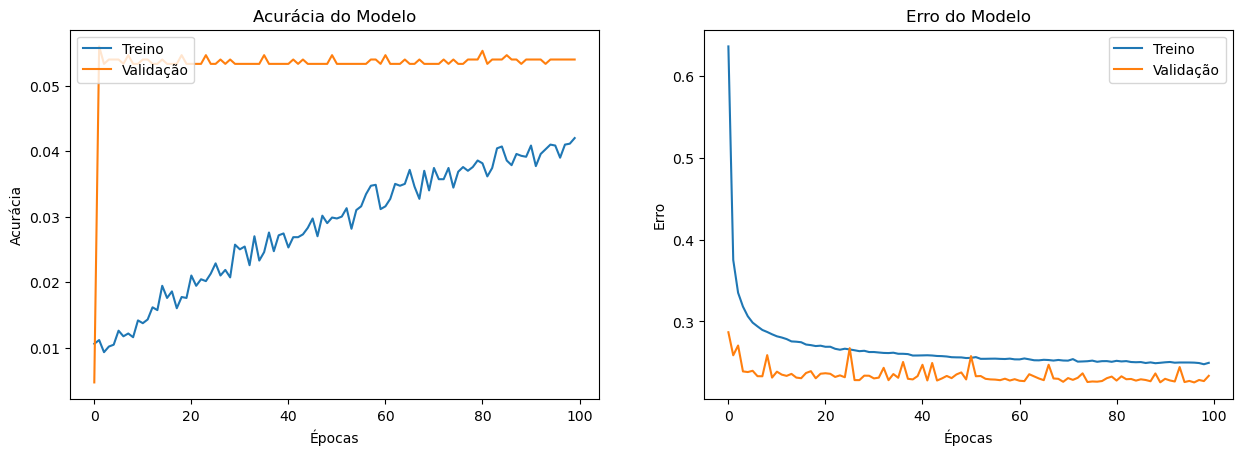

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(15)
#Acuracia do Modelo
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Acurácia do Modelo')
ax1.set_ylabel('Acurácia')
ax1.set_xlabel('Épocas')
ax1.legend(['Treino', 'Validação'], loc='upper left')


#Erro do Modelo
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Erro do Modelo')
ax2.set_ylabel('Erro')
ax2.set_xlabel('Épocas')
ax2.legend(['Treino', 'Validação'], loc='upper right')


In [ ]:
y_test[0]

array([-0.57449337, -0.95482571, -2.96718092, -2.98195703,  0.0162422 ,
       -0.43254371, -0.77908585, -0.62028243, -1.07713992,  0.12159231,
       -0.61619196, -0.45796719, -1.8497921 , -2.01535749, -1.122959  ,
       -0.66817201, -1.14961482, -0.63645001, -0.09651034, -0.47063785,
       -0.42212631, -0.55675588, -0.70212911, -1.06860392, -0.23755174,
       -0.57328863, -1.07966562, -0.11750254, -1.88595022, -0.87814813,
       -0.82055892, -1.19138296, -0.4324374 , -1.15191407, -0.89842351,
       -0.26760823, -1.45538937, -0.8463493 , -1.08836786, -1.1513394 ,
       -0.23736428, -1.1432175 , -1.10514892, -1.2195083 , -0.71283548,
       -0.56335076, -0.13240995, -0.27660298, -1.30338222, -1.16261013,
       -0.56025719, -1.3083229 , -1.3042312 , -1.35784254, -1.32109576,
       -0.09063867, -1.52202218, -0.57468424, -0.57253073, -0.12351555,
       -1.44993232, -1.76103463, -1.63248508, -0.96473556, -0.67049543,
       -0.6335379 , -1.1907617 , -0.54088166, -2.8260208 , -1.85

In [ ]:
p = X_test[0].reshape(1,50,1)

In [ ]:
p

array([[[-0.57449337],
        [-2.96718092],
        [ 0.0162422 ],
        [-0.77908585],
        [-1.07713992],
        [-0.61619196],
        [-1.8497921 ],
        [-1.122959  ],
        [-1.14961482],
        [-0.09651034],
        [-0.42212631],
        [-0.70212911],
        [-0.23755174],
        [-1.07966562],
        [-1.88595022],
        [-0.82055892],
        [-0.4324374 ],
        [-0.89842351],
        [-1.45538937],
        [-1.08836786],
        [-0.23736428],
        [-1.10514892],
        [-0.71283548],
        [-0.13240995],
        [-1.30338222],
        [-0.56025719],
        [-1.3042312 ],
        [-1.32109576],
        [-1.52202218],
        [-0.57253073],
        [-1.44993232],
        [-1.63248508],
        [-0.67049543],
        [-1.1907617 ],
        [-2.8260208 ],
        [-1.34979394],
        [-1.94846103],
        [-0.90475761],
        [-0.6325052 ],
        [-1.15461951],
        [-1.25892887],
        [-1.20140875],
        [-2.00496954],
        [-0

In [ ]:
predict = model.predict(p)

1/1 [==============================] - 0s 272ms/step


In [ ]:
predict

array([[-0.78549844, -0.98030484, -0.9774032 , -0.9788254 , -0.96881026,
        -0.9513019 , -0.952747  , -0.95229733, -0.9804356 , -1.0056702 ,
        -0.9668709 , -0.9597029 , -0.96162415, -0.96620744, -0.9703135 ,
        -0.96337175, -0.9771227 , -0.9867569 , -0.96605724, -0.969726  ,
        -1.002164  , -0.97962695, -0.9673178 , -0.9855376 , -0.9899727 ,
        -0.9744608 , -0.981316  , -0.9763809 , -0.9734374 , -0.9635782 ,
        -0.9638802 , -0.96797705, -0.9566139 , -0.95677835, -0.97526526,
        -0.96360797, -0.9719293 , -0.9908623 , -0.96509635, -0.9779354 ,
        -0.9653431 , -1.0083462 , -0.9687957 , -0.9833351 , -0.9808971 ,
        -1.0101427 , -0.9995873 , -0.9952009 , -0.960633  , -0.9795295 ,
        -0.97301793, -0.97069114, -0.9801333 , -0.9721227 , -0.9677246 ,
        -0.9761448 , -0.99560857, -0.96510273, -0.9939563 , -0.96187323,
        -0.97492653, -0.94901323, -0.96482444, -0.9782866 , -0.9727925 ,
        -0.9362799 , -0.9892336 , -0.95740145, -0.9

In [ ]:
y_test[0]

array([-0.57449337, -0.95482571, -2.96718092, -2.98195703,  0.0162422 ,
       -0.43254371, -0.77908585, -0.62028243, -1.07713992,  0.12159231,
       -0.61619196, -0.45796719, -1.8497921 , -2.01535749, -1.122959  ,
       -0.66817201, -1.14961482, -0.63645001, -0.09651034, -0.47063785,
       -0.42212631, -0.55675588, -0.70212911, -1.06860392, -0.23755174,
       -0.57328863, -1.07966562, -0.11750254, -1.88595022, -0.87814813,
       -0.82055892, -1.19138296, -0.4324374 , -1.15191407, -0.89842351,
       -0.26760823, -1.45538937, -0.8463493 , -1.08836786, -1.1513394 ,
       -0.23736428, -1.1432175 , -1.10514892, -1.2195083 , -0.71283548,
       -0.56335076, -0.13240995, -0.27660298, -1.30338222, -1.16261013,
       -0.56025719, -1.3083229 , -1.3042312 , -1.35784254, -1.32109576,
       -0.09063867, -1.52202218, -0.57468424, -0.57253073, -0.12351555,
       -1.44993232, -1.76103463, -1.63248508, -0.96473556, -0.67049543,
       -0.6335379 , -1.1907617 , -0.54088166, -2.8260208 , -1.85

1/1 [==============================] - 0s 16ms/step


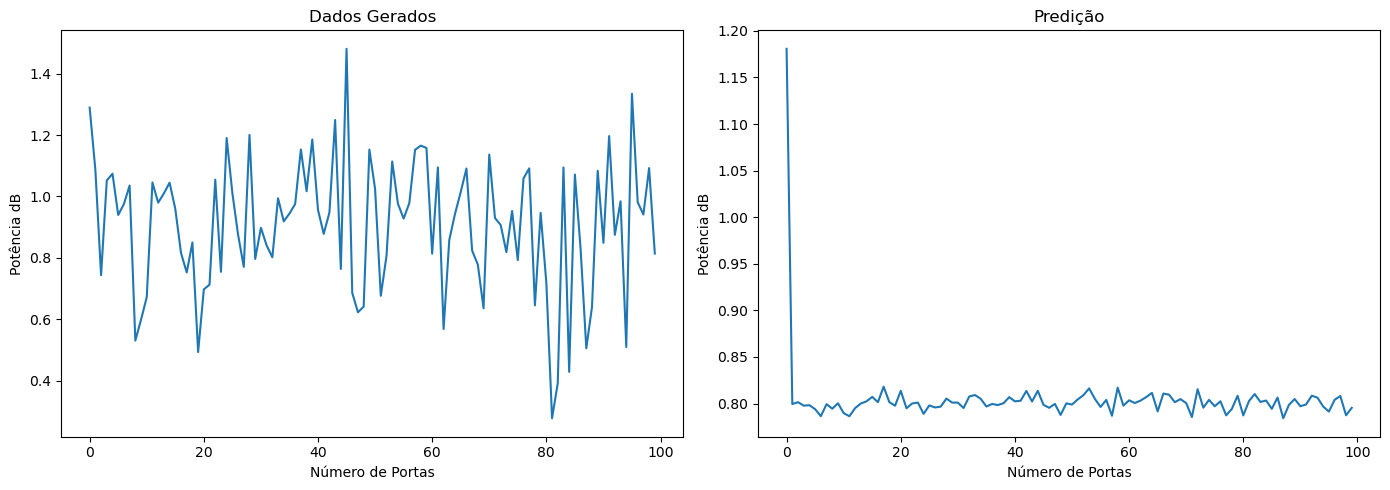

In [ ]:
POS = 3

p = X_test[POS].reshape(1,50,1)
predict = model.predict(p)

x = list(range(100))

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1
axs[0].plot(x, y_test[POS])
axs[0].set_title('Dados Gerados')
axs[0].set_xlabel('Número de Portas')
axs[0].set_ylabel('Potência dB')

# Gráfico 2
axs[1].plot(x, predict[0])
axs[1].set_title('Predição')
axs[1].set_xlabel('Número de Portas')
axs[1].set_ylabel('Potência dB')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

In [ ]:
np.argmax(y_test[POS], axis=0)

45

In [ ]:
np.argmax(predict[0], axis=0)

0

In [ ]:
acertos = 0

for i in range(len(y_test)):
    p = X_test[i].reshape(1,50,1)
    predict = model.predict(p)

    port_test = np.argmax(y_test[i], axis=0)
    port_predict = np.argmax(predict[0], axis=0)

    if port_test == port_predict:
        acertos += 1

accuracy = acertos/len(y_test)

print(f'A acurácia foi:'+str(accuracy*100)+'%')


1/1 [==============================] - 0s 14ms/step
A acurácia foi:5.733333333333333%
